<a href="https://colab.research.google.com/github/sangjin94/itwill-python/blob/main/ml08_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

# Data

In [ ]:
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [ ]:
fish=pd.read_csv(fish_csv)

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

# Binary-class Classification (이진분류)

In [ ]:
# fish DataFrame에서 Bream(도미), Smelt(빙어)만 선택
df1= fish[fish.Species.isin(['Bream','Smelt'])]
# (fish.Species=='Bream')| (fish.Species=='Smelt') 와 같은 결과

In [ ]:
df1['Species'].value_counts()

Bream    35
Smelt    14
Name: Species, dtype: int64

In [ ]:
# 특성 행렬
X=df1.drop(columns='Species').values
# 타겟 벡터
y=df1['Species'].values

In [ ]:
X[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [ ]:
y[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.25,
                                               stratify=y,
                                               random_state=42)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((36, 5), (13, 5), (36,), (13,))

In [24]:
np.unique(y_train,return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([26, 10]))

# KNN Classification

In [25]:
# 모델 생성
scaler=StandardScaler()
clf=KNeighborsClassifier()
knn_model = Pipeline(steps=[('scaler',scaler),
                            ('clf',clf)])

In [26]:
# 모델 훈련
knn_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [28]:
# 훈련 셋의 예측값
train_pred=knn_model.predict(X_train)
train_pred

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [30]:
y_train

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [31]:
confusion_matrix(y_train,train_pred)

array([[26,  0],
       [ 0, 10]])

In [35]:
# KNN알고리즘의 분류 예측 확률(probability) 
train_prob=knn_model.predict_proba(X_train)
train_prob[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [43]:
# 테스트 셋에서의 평가
test_pred= knn_model.predict(X_test)
test_pred

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [44]:
y_test

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [45]:
Samples=X_train[:3]
Samples

array([[720.    ,  35.    ,  40.6   ,  16.3618,   6.09  ],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [  8.7   ,  11.3   ,  12.6   ,   1.9782,   1.2852]])

In [47]:
Samples_scaled=knn_model['scaler'].transform(Samples)
Samples_scaled

array([[ 0.85382543,  0.79935928,  0.80567236,  0.8021994 ,  0.94206579],
       [-0.24256812,  0.20479453,  0.20860116,  0.20215901,  0.09992817],
       [-1.33066961, -1.54917151, -1.54897461, -1.57423679, -1.53349422]])

In [49]:
neighbors=knn_model['clf'].kneighbors(Samples_scaled,return_distance=False)
neighbors

array([[ 0,  9, 16, 21, 35],
       [ 1, 28, 19, 15, 33],
       [ 2,  4, 18,  6,  8]])

In [50]:
y_train[neighbors]

array([['Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
       ['Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
       ['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt']], dtype=object)

# Logistic Regression

In [51]:
logit_model = Pipeline(steps=[('scaler',StandardScaler()),('clf',LogisticRegression())])

In [53]:
# 모델 훈련
logit_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [55]:
train_prob=logit_model.predict_proba(X_train)
train_prob[:6]

array([[9.97291432e-01, 2.70856773e-03],
       [9.59020552e-01, 4.09794484e-02],
       [4.26912628e-02, 9.57308737e-01],
       [9.84096878e-01, 1.59031225e-02],
       [4.23568833e-02, 9.57643117e-01],
       [9.99167490e-01, 8.32509978e-04]])

In [58]:
train_pred= logit_model.predict(X_train)
train_pred[:6]

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream'], dtype=object)

In [59]:
confusion_matrix(y_train,train_pred)

array([[26,  0],
       [ 0, 10]])

In [63]:
test_prob=logit_model.predict_proba(X_test)
test_prob[:5]

array([[9.97328384e-01, 2.67161624e-03],
       [9.94425341e-01, 5.57465921e-03],
       [9.99430626e-01, 5.69374399e-04],
       [1.02252107e-01, 8.97747893e-01],
       [5.42567620e-02, 9.45743238e-01]])

In [64]:
confusion_matrix(y_test,test_pred)

array([[9, 0],
       [0, 4]])

In [66]:
logit_model['clf'].intercept_

array([-2.70041052])

In [67]:
logit_model['clf'].coef_

array([[-0.55266843, -0.78808545, -0.82264592, -0.85732701, -0.80231813]])

In [86]:
train_prob[0:5]

array([[0.99729143, 0.00270857],
       [0.95902055, 0.04097945],
       [0.04269126, 0.95730874],
       [0.98409688, 0.01590312],
       [0.04235688, 0.95764312]])

In [88]:
w0=logit_model['clf'].intercept_
w=logit_model['clf'].coef_
z=w0+logit_model['scaler'].transform(X_train[:5]) @ w[0]
1/(1+np.exp(-z))

array([0.00270857, 0.04097945, 0.95730874, 0.01590312, 0.95764312])

# sigmoid 함수

$$
\phi(z)=\dfrac{e^z}{e^z +1}=\dfrac{1}{1+e^{-z}}
$$

* odds 비(오즈비): 양성이 될 확률과 음성이 될 확률의 비율. $ \frac{p}{1-p}$
* logit: odds비에 자연로그를 취한 값. $\log( \frac{p}{1-p})$

* p가 양성이 될 확률

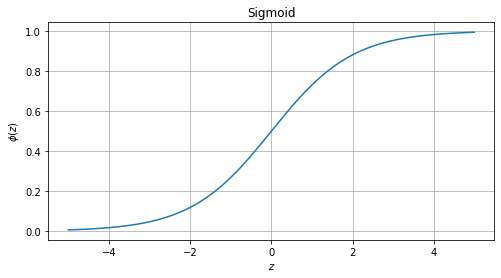

In [70]:
z=np.arange(-5,5,0.01) # x 좌표
sigmoid=1/(1+np.exp(-z)) # y 좌표

plt.figure(figsize=(8,4))
plt.plot(z,sigmoid)
plt.ylabel('$\phi(z)$')
plt.xlabel('$z$')
plt.title('Sigmoid')
plt.grid()
plt.show()

* 선형 회귀 
$$
z=w_0 +w_1 \cdot x_1 + w2 \cdot x_2 +\cdots= w_0 + \sum_j w_j \dot x_j 
$$

* 선형 회귀 공식으로 계산된 결과를 sigmoid 함수의 argument
$$
\phi(z) = \dfrac{1}{1+e^{-z}}= \dfrac {1}{1+exp(-(w_0 + \sum_j w_j \dot x_j))}
$$

# SGD Classifier

SGD(Stochastic Gradient Descent, 확률적 경사 하강법)으로 찾은 선형 회귀식을 sigmoid 함수의 argument로 전달해서 양성일 확률을 계산하고, 분

In [91]:
sgd_model=Pipeline(steps=[('scaler',StandardScaler()),('clf',SGDClassifier(loss='log'))])
# 확률 기반 분류기(classifier)를 만들 떄는 loss='log'로 설정.
# loss의 기본값인 'hinge'는 분류 확률을 계산하지 않음 = SVM

In [92]:
sgd_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [94]:
train_prob=sgd_model.predict_proba(X_train)
train_prob[:5]

array([[9.99999928e-01, 7.16832263e-08],
       [9.99791313e-01, 2.08686759e-04],
       [1.20908167e-04, 9.99879092e-01],
       [9.99987815e-01, 1.21853705e-05],
       [1.18230226e-04, 9.99881770e-01]])

In [95]:
train_pred=sgd_model.predict(X_train)
train_pred[:5]

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt'], dtype='<U5')

In [96]:
confusion_matrix(y_train,train_pred)

array([[26,  0],
       [ 0, 10]])

# Multi-class Classification(다중 클래스 분류)